In [1]:
# Lecture 5: Bayesian Formalism 1

In [2]:
# The primary goal in any modeling analysis is to choose parameters of a model such that we can best 
# explain the data with the model. There are a number of approaches to choose model parameters. 

In [ ]:
# FREQUENTIST STATISTICS
# Maximum Likelihood

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sn

from scipy.stats import norm

In [4]:
# Example: Linear regression of one dimensional straight line

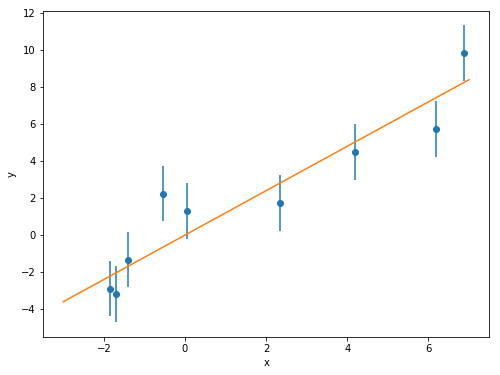

In [5]:
plt.figure(figsize=[8,6])

## GENERATE SYNTHETIC DATA
n=9
a = 1.2 # SLOPE
b = 0 # INTERSECTION 

s = 1.5 # STD OF ERROR 

x = np.random.uniform(low=-3, high=7, size=n) 
y = a*x+ b + s*np.random.randn(n)


#plt.subplot(2,2,2) 
plt.errorbar(x,y, yerr=s, fmt='o')
plt.xlabel('x')
plt.ylabel('y')

xr = np.linspace(-3, 7, 100) 
plt.plot(xr, a*xr)

1.14815456897988 0.18215510204152627


Text(0.5,1,'Prior for a')

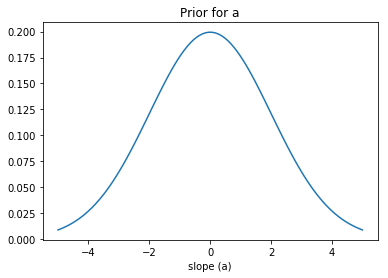

In [8]:
plt.figure(figsize=[6,4])
## ANALYTIC SOLUTION TO THE MAXIMUM LIKELIHOOD 
a = (n*np.sum(x*y)-np.sum(x)*np.sum(y))/(n*np.sum(x**2)-(np.sum(x))**2)
b = (1/n)*(np.sum(y)-a*np.sum(x))
print (a, b)
# ======================================
## PLOT THE PDF OF THE PRIOR
# ======================================
I = np.eye(2)

## PRIOR 
sig2 = 4   # WIDTH OF THE PRIOR

p_w = lambda w : (1/np.sqrt(2*np.pi*sig2))*np.exp( - (w**2)/(2*sig2)) # remove the '( )'

asp = np.linspace(-5,5, 100)

P=p_w(asp)

plt.plot(asp, P)
plt.xlabel('slope (a)')
plt.title('Prior for a')

Text(0.5,1,'Likelihood')

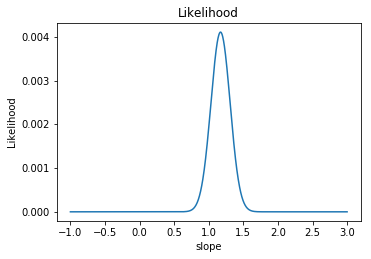

In [9]:
plt.figure(figsize=[12,8])

## PLOT THE PDF OF THE LIKELIHOOD
N=1000
asp = np.linspace(-1,3, N)

p_l = lambda asp : (1/np.sqrt(2*np.pi*s**2))*np.exp( - (np.sum( x*x*(y/x-asp)**2)/(2*s**2)))

P = np.zeros(N)

for k in np.arange(0, asp.size):
    P[k] = p_l(asp[k])


plt.subplot(2,2,1)
plt.plot(asp, P)
plt.xlabel('slope')
plt.ylabel('Likelihood')

plt.title('Likelihood')

In [10]:
print (np.mean(y/x), np.dot(y, 1/x), np.sqrt(s**2/(np.dot(1/x,1/x))))

3.8674008067458283 34.80660726071246 0.06467767387677298


Text(0.5,1,'Posterior')

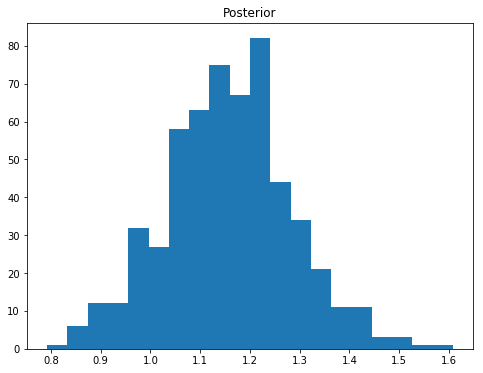

In [11]:
plt.figure(figsize=[8,6])
## NOW SAMPLE FROM THE POSTERIOR USING REJECTION METHOD 
N=30000
asp = np.random.uniform(low=-10, high=10, size=N)

post = lambda wsp: p_l(wsp) * p_w(wsp) 

ptr = np.zeros(N)

for k in np.arange(0, N):
    ptr[k]= post(asp[k]) 


ysp =  np.random.uniform(low=0, high=np.max(ptr), size=N)
    
idx = (ysp<ptr)


g=plt.hist(asp[idx], 20)

plt.title('Posterior')

In [12]:
print (np.sum(idx), np.mean(asp[idx]))

564 1.1566709037749345


In [ ]:
# Example: Infectious disease in a small city

In [ ]:
plt.figure(figsize=[10,8])
## INITIALIZING
n = 20 # number of data
N =5000 # samples
k=3  # binomial k

## THE LIKELIHOOD:BINOMIAL 
theta=0.1

liks  = np.random.binomial( n, theta, [N,1]);

plt.subplot(2,2,1)
plt.hist(liks, 20)
plt.title('Likelihood sampling over k for $\\theta$=0.1, n=20')

plt.xlabel('k')

# I need samples of theta
lik_theta = lambda (theta): theta**k * (1-theta)**(n-k)
#use rejection to get this distribution 
X=np.random.uniform(low=0, high=1, size=N)
Y=np.random.uniform(low=0, high=0.000213, size=N)
Yt = lik_theta(X) 

Xa = X[Y<Yt]
plt.subplot(2,2,2)
plt.hist(Xa, 20)
plt.xlabel('$\\theta$')
plt.title('Likelihood over $\\theta$')

## PRIOR
alpha=2
beta=20
prs = np.random.beta(alpha, beta, [N,1]);

plt.subplot(2,2,3)
plt.hist(prs, 20)
plt.title('Prior Samples')
plt.xlabel('$\\theta$')
## POSTERIOR EXACT

posts = np.random.beta(alpha+k, beta+n-k, [N,1]);
plt.subplot(2,2,4) 
plt.hist(posts, 20)
plt.title('posterior sample')
plt.xlabel('$\\theta$');
plt.tight_layout()

In [13]:
# The Normal Model
# Example: Moth wing

In [14]:
Y = [16.4, 17.0, 17.2, 17.4, 18.2, 18.2, 18.2, 19.9, 20.8]
# Prior mean
mu_prior = 19.5
# prior std
tau = 10 
N = 10000

In [15]:
#Data Quantities
sig = np.std(Y) # assume that is the value of KNOWN sigma (in the likelihood)
mu_data = np.mean(Y)
n = len(Y)
kappa = sig**2 / tau**2
sig_post =1./( 1./tau**2 + n/sig**2);
# posterior mean
mu_post = kappa / (kappa + n) *mu_prior + n/(kappa+n)* mu_data

#samples
theta_prior = np.random.normal(loc=mu_prior, scale=tau, size=N);
theta_post = np.random.normal(loc=mu_post, scale=sig_post, size=N)

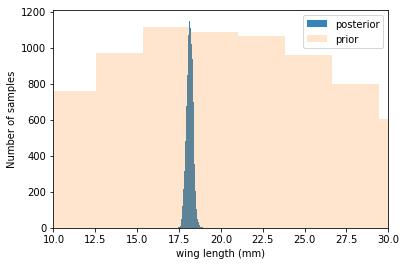

In [16]:
plt.hist(theta_post, bins=30, alpha=0.9, label="posterior")
plt.hist(theta_prior, bins=30, alpha=0.2, label="prior")
plt.xlim([10, 30])
plt.xlabel("wing length (mm)")
plt.ylabel("Number of samples")
plt.legend()

In [17]:
# http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-5.html